# 用いるデータ

<a href="http://mh.rgr.jp/memo/mq0111.htm" target="_blank">分子性物質のデータ（融点・沸点）</a>

In [1]:
import pandas as pd
data = [['HF', 19.5, 20.0],
        ['HCl', -84.9, 36.5],
        ['HBr', -67.0, 80.9],
        ['HI', -35.1, 127.9],
        ['H2O', 100.0, 18.0],
        ['H2S', -60.7, 34.1],
        ['H2Se', -42, 81.0],
        ['H2Te', -1.8, 129.6],
        ['NH3', -33.4, 17.0],
        ['PH3', -87, 34.0],
        ['AsH3', -55, 77.9],
        ['SbH3', -17.1, 124.8],
        ['CH4', -161.49, 16.0],
        ['SiH4', -111.8, 32.1],
        ['GeH4', -90, 76.6],
        ['SnH4', -52, 122.7],
        ['He', -268.934, 4.0],
        ['Ne', -246.048, 20.2],
        ['Ar', -185.7, 39.9],
        ['Kr', -152.3, 83.8],
        ['Xe', -108.1, 131.3],
       ]
df = pd.DataFrame(data, columns = ['molecule', 'boiling point', 'molecular weight'])
df

,molecule,boiling point,molecular weight
0,HF,19.500,20.0
1,HCl,-84.900,36.5
2,HBr,-67.000,80.9
3,HI,-35.100,127.9
4,H2O,100.000,18.0
5,H2S,-60.700,34.1
6,H2Se,-42.000,81.0
7,H2Te,-1.800,129.6
8,NH3,-33.400,17.0
9,PH3,-87.000,34.0


In [2]:
X = df.loc[:, ['molecular weight']].as_matrix()
X

array([[  20. ],
       [  36.5],
       [  80.9],
       [ 127.9],
       [  18. ],
       [  34.1],
       [  81. ],
       [ 129.6],
       [  17. ],
       [  34. ],
       [  77.9],
       [ 124.8],
       [  16. ],
       [  32.1],
       [  76.6],
       [ 122.7],
       [   4. ],
       [  20.2],
       [  39.9],
       [  83.8],
       [ 131.3]])

In [3]:
Y = df['boiling point'].as_matrix()
Y

array([  19.5  ,  -84.9  ,  -67.   ,  -35.1  ,  100.   ,  -60.7  ,
        -42.   ,   -1.8  ,  -33.4  ,  -87.   ,  -55.   ,  -17.1  ,
       -161.49 , -111.8  ,  -90.   ,  -52.   , -268.934, -246.048,
       -185.7  , -152.3  , -108.1  ])

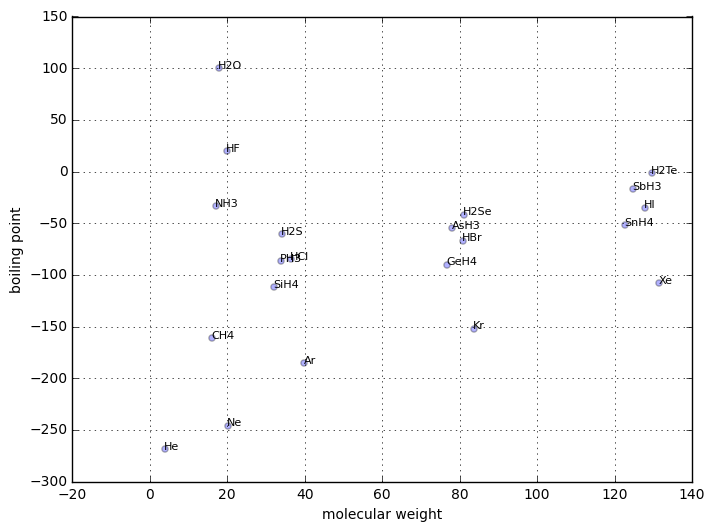

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# 散布図
plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.3)
for name, x, y in zip(df.loc[:, ['molecule']].as_matrix(), X, Y):
    plt.text(x, y, name[0], size=8)
plt.xlabel('molecular weight')
plt.ylabel('boiling point')
plt.grid()
plt.show()

In [5]:
import math
import numpy as np
logX = np.array([[math.log(x)] for x in X[:,0]])

In [6]:
logX

array([[ 2.99573227],
       [ 3.59731226],
       [ 4.39321382],
       [ 4.85124871],
       [ 2.89037176],
       [ 3.52929738],
       [ 4.39444915],
       [ 4.86445278],
       [ 2.83321334],
       [ 3.52636052],
       [ 4.35542595],
       [ 4.82671246],
       [ 2.77258872],
       [ 3.46885603],
       [ 4.33859708],
       [ 4.80974235],
       [ 1.38629436],
       [ 3.0056826 ],
       [ 3.68637632],
       [ 4.42843301],
       [ 4.87748478]])

# まずは一番便利な scikit-learn から

In [7]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [8]:
lr.fit(logX, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# 回帰係数
lr.coef_

array([ 33.87205496])

In [10]:
# 切片
lr.intercept_

-211.66384118386563

In [11]:
print("y = f(x) = wlogx + t; (w, t) = ({0}, {1})".format(lr.coef_[0], lr.intercept_))

y = f(x) = wlogx + t; (w, t) = (33.872054963641745, -211.66384118386563)


In [12]:
# 決定係数R2
lr.score(logX, Y)

0.13487033631665779

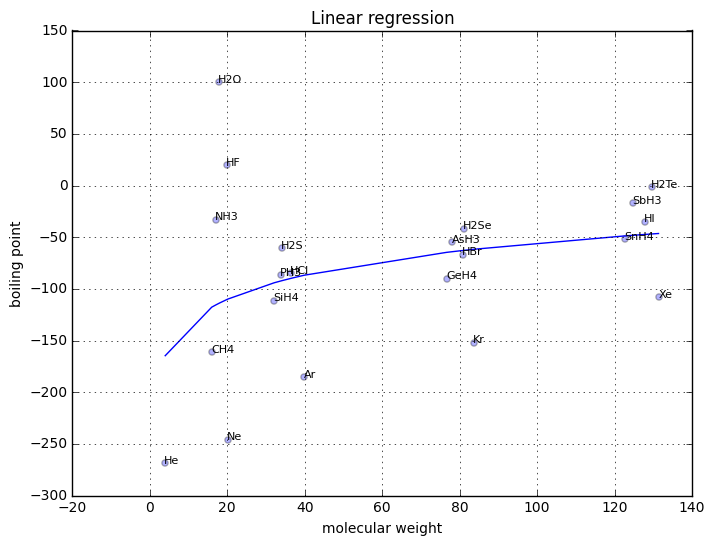

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# 散布図
plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.3)
 
# 回帰直線
plt.title('Linear regression')
plt.plot(sorted(X), sorted(lr.predict(logX)))
for name, x, y in zip(df.loc[:, ['molecule']].as_matrix(), X, Y):
    plt.text(x, y, name[0], size=8)
plt.xlabel('molecular weight')
plt.ylabel('boiling point')
plt.grid()
plt.show()

# 次は、ガチPythonで。

In [14]:
# 平均値を求める関数
def mean(list):
    sum = 0
    for x in list:
        sum += x
    return sum / len(list)

In [15]:
# 分散を求める関数
def variance(list):
    ave = mean(list)
    sum = 0
    for x in list:
        sum += (x - ave) ** 2
    return sum / len(list)

In [16]:
# 標準偏差を求める関数
import math
def standard_deviation(list):
    return math.sqrt(variance(list))

In [17]:
# 共分散 = 偏差積の平均
def covariance(list1, list2): 
    mean1 = mean(list1)
    mean2 = mean(list2)
    sum = 0
    for d1, d2 in zip(list1, list2):
        sum += (d1 - mean1) * (d2 - mean2)
    return sum / len(list1)

In [18]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1, list2) / (standard_deviation(list1) * standard_deviation(list2))

In [19]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））
def w_fit(xlist, ylist):
    return correlation(xlist, ylist) * standard_deviation(ylist) / standard_deviation(xlist)

In [20]:
# y切片＝yの平均－（傾き＊xの平均）
def t_fit(xlist, ylist):
    return mean(ylist) - w_fit(xlist, ylist) * mean(xlist)

In [21]:
# 回帰直線の式を表示
w = w_fit(logX, Y)
t = t_fit(logX, Y)
print("y = f(x) = wlogx + t; (w, t) = ({0}, {1})".format(w, t))

y = f(x) = wlogx + t; (w, t) = ([ 33.87205496], [-211.66384118])


In [22]:
# 回帰直線の式を関数として表現
def f(x):
    return w * x + t

In [23]:
# 決定係数R2
def r2(xlist, ylist):
    wa1 = 0.
    wa2 = 0.
    for x, y in zip(xlist, ylist):
        wa1 += (y - f(x))**2
        wa2 += (y - mean(ylist))**2
    return 1. - wa1 / wa2

In [24]:
r2(logX, Y)

array([ 0.13487034])

# さて、表計算で解けと言われたので pandas で書いてみましょうか。

In [25]:
import copy
from IPython.display import display
excel = copy.deepcopy(df)
excel

,molecule,boiling point,molecular weight
0,HF,19.500,20.0
1,HCl,-84.900,36.5
2,HBr,-67.000,80.9
3,HI,-35.100,127.9
4,H2O,100.000,18.0
5,H2S,-60.700,34.1
6,H2Se,-42.000,81.0
7,H2Te,-1.800,129.6
8,NH3,-33.400,17.0
9,PH3,-87.000,34.0


In [26]:
excel['y'] = excel['boiling point']
excel['x'] = excel['molecular weight']
excel['log(x)'] = [math.log(x) for x in excel['x']]
mean_y = mean(excel['y'])
mean_logx = mean(excel['log(x)'])
display(excel, pd.DataFrame([[mean_y, mean_logx]], columns=['y','log(x)'], index=['mean']))

,molecule,boiling point,molecular weight,y,x,log(x)
0,HF,19.500,20.0,19.500,20.0,2.995732
1,HCl,-84.900,36.5,-84.900,36.5,3.597312
2,HBr,-67.000,80.9,-67.000,80.9,4.393214
3,HI,-35.100,127.9,-35.100,127.9,4.851249
4,H2O,100.000,18.0,100.000,18.0,2.890372
5,H2S,-60.700,34.1,-60.700,34.1,3.529297
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453
8,NH3,-33.400,17.0,-33.400,17.0,2.833213
9,PH3,-87.000,34.0,-87.000,34.0,3.526361


,y,log(x)
mean,-82.898667,3.801516


In [27]:
excel['y-mean(y)'] = [y - mean_y for y in excel['y']]
excel['log(x)-mean(log(x))'] = [logx - mean_logx for logx in excel['log(x)']]
display(excel, pd.DataFrame([[mean_y, mean_logx]], columns=['y','log(x)'], index=['mean']))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x))
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156


,y,log(x)
mean,-82.898667,3.801516


In [28]:
excel['(y-mean(y))**2'] = [sa ** 2 for sa in excel['y-mean(y)']]
excel['(log(x)-mean(log(x)))**2'] = [sa ** 2 for sa in excel['log(x)-mean(log(x))']]
display(excel, pd.DataFrame([[mean_y, mean_logx]], columns=['y','log(x)'], index=['mean']))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711


,y,log(x)
mean,-82.898667,3.801516


In [29]:
variance_y = mean(excel['(y-mean(y))**2'])
variance_logx = mean(excel['(log(x)-mean(log(x)))**2'])
sd_y = math.sqrt(variance_y)
sd_logx = math.sqrt(variance_logx)
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y','log(x)'], index=['mean', 'variance', 'sd']))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


In [30]:
excel['(y-mean(y)) * (log(x)-mean(log(x)))'] = excel['y-mean(y)'] * excel['log(x)-mean(log(x))']
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y','log(x)'], index=['mean', 'variance', 'sd']))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2,(y-mean(y)) * (log(x)-mean(log(x)))
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288,-82.511226
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699,0.408681
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106,9.407199
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938,50.175802
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185,-166.647151
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103,-6.042901
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569,24.250157
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834,86.202719
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611,-47.929713
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711,1.128506


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


In [31]:
covar_logxy = mean(excel['(y-mean(y)) * (log(x)-mean(log(x)))'])
corr_logxy = covar_logxy / (sd_logx * sd_y)
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y','log(x)'], index=['mean', 'variance', 'sd']),
       pd.DataFrame([covar_logxy, corr_logxy], index=['covariance', 'correlation'], columns=['log(x),y']))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2,(y-mean(y)) * (log(x)-mean(log(x)))
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288,-82.511226
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699,0.408681
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106,9.407199
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938,50.175802
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185,-166.647151
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103,-6.042901
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569,24.250157
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834,86.202719
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611,-47.929713
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711,1.128506


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


,"log(x),y"
covariance,28.073248
correlation,0.367247


In [32]:
w = corr_logxy * sd_y / sd_logx
t = mean_y - w * mean_logx
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y', 'log(x)'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_logxy, corr_logxy], index=['covariance', 'correlation'], columns=['log(x),y']),
        pd.DataFrame([[w, t]], columns=["w", "t"], index=["y = f(x) = wlog(x) + t"]))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2,(y-mean(y)) * (log(x)-mean(log(x)))
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288,-82.511226
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699,0.408681
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106,9.407199
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938,50.175802
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185,-166.647151
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103,-6.042901
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569,24.250157
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834,86.202719
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611,-47.929713
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711,1.128506


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


,"log(x),y"
covariance,28.073248
correlation,0.367247


,w,t
y = f(x) = wlog(x) + t,33.872055,-211.663841


In [33]:
# 回帰直線の式を関数として表現
def f(x):
    return w * x + t

In [34]:
excel['f(x)'] = f(excel['log(x)'])
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y','log(x)'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_logxy, corr_logxy], index=['covariance', 'correlation'], columns=['log(x),y']),
        pd.DataFrame([[w, t]], columns=["w", "t"], index=["y = f(x) = wlog(x) + t"]))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2,(y-mean(y)) * (log(x)-mean(log(x))),f(x)
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288,-82.511226,-110.192233
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699,0.408681,-89.815483
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106,9.407199,-62.856661
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938,50.175802,-47.342078
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185,-166.647151,-113.761010
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103,-6.042901,-92.119286
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569,24.250157,-62.814818
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834,86.202719,-46.894829
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611,-47.929713,-115.697083
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711,1.128506,-92.218764


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


,"log(x),y"
covariance,28.073248
correlation,0.367247


,w,t
y = f(x) = wlog(x) + t,33.872055,-211.663841


In [35]:
excel['(y-f(x))**2'] = (excel['y'] - excel['f(x)'])**2
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y','log(x)'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_logxy, corr_logxy], index=['covariance', 'correlation'], columns=['log(x),y']),
        pd.DataFrame([[w, t]], columns=["w", "t"], index=["y = f(x) = wlog(x) + t"]))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2,(y-mean(y)) * (log(x)-mean(log(x))),f(x),(y-f(x))**2
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288,-82.511226,-110.192233,16820.075290
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699,0.408681,-89.815483,24.161969
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106,9.407199,-62.856661,17.167258
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938,50.175802,-47.342078,149.868481
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185,-166.647151,-113.761010,45693.769454
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103,-6.042901,-92.119286,987.171545
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569,24.250157,-62.814818,433.256643
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834,86.202719,-46.894829,2033.543613
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611,-47.929713,-115.697083,6772.809882
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711,1.128506,-92.218764,27.235494


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


,"log(x),y"
covariance,28.073248
correlation,0.367247


,w,t
y = f(x) = wlog(x) + t,33.872055,-211.663841


In [36]:
r2 = 1. - sum(excel['(y-f(x))**2']) / sum(excel['(y-mean(y))**2'])
display(excel, pd.DataFrame([[mean_y, mean_logx], [variance_y, variance_logx], [sd_y, sd_logx]], 
                            columns=['y','log(x)'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_logxy, corr_logxy], index=['covariance', 'correlation'], columns=['log(x),y']),
        pd.DataFrame([[w, t, r2]], columns=["w", "t", "R2"], index=["y = f(x) = wlog(x) + t"]))

,molecule,boiling point,molecular weight,y,x,log(x),y-mean(y),log(x)-mean(log(x)),(y-mean(y))**2,(log(x)-mean(log(x)))**2,(y-mean(y)) * (log(x)-mean(log(x))),f(x),(y-f(x))**2
0,HF,19.500,20.0,19.500,20.0,2.995732,102.398667,-0.805784,10485.486935,0.649288,-82.511226,-110.192233,16820.075290
1,HCl,-84.900,36.5,-84.900,36.5,3.597312,-2.001333,-0.204204,4.005335,0.041699,0.408681,-89.815483,24.161969
2,HBr,-67.000,80.9,-67.000,80.9,4.393214,15.898667,0.591697,252.767602,0.350106,9.407199,-62.856661,17.167258
3,HI,-35.100,127.9,-35.100,127.9,4.851249,47.798667,1.049732,2284.712535,1.101938,50.175802,-47.342078,149.868481
4,H2O,100.000,18.0,100.000,18.0,2.890372,182.898667,-0.911145,33451.922268,0.830185,-166.647151,-113.761010,45693.769454
5,H2S,-60.700,34.1,-60.700,34.1,3.529297,22.198667,-0.272219,492.780802,0.074103,-6.042901,-92.119286,987.171545
6,H2Se,-42.000,81.0,-42.000,81.0,4.394449,40.898667,0.592933,1672.700935,0.351569,24.250157,-62.814818,433.256643
7,H2Te,-1.800,129.6,-1.800,129.6,4.864453,81.098667,1.062936,6576.993735,1.129834,86.202719,-46.894829,2033.543613
8,NH3,-33.400,17.0,-33.400,17.0,2.833213,49.498667,-0.968303,2450.118002,0.937611,-47.929713,-115.697083,6772.809882
9,PH3,-87.000,34.0,-87.000,34.0,3.526361,-4.101333,-0.275156,16.820935,0.075711,1.128506,-92.218764,27.235494


,y,log(x)
mean,-82.898667,3.801516
variance,7050.465101,0.828803
sd,83.967048,0.910386


,"log(x),y"
covariance,28.073248
correlation,0.367247


,w,t,R2
y = f(x) = wlog(x) + t,33.872055,-211.663841,0.13487
